Logistic Regression Implemented

Logistic Regression tries to find a decision boundary (e.g., a line in 2D or a hyperplane in higher dimensions) that separates classes.

When there are multiple clusters per class:

Logistic Regression doesn’t separate individual clusters but considers the overall pattern of the clusters for each class.

If the data is not linearly separable (e.g., overlapping clusters), logistic regression may struggle without feature transformations (e.g., polynomial features) or additional complexity (e.g., kernel methods in SVM).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from sklearn.datasets import make_classification 

X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [3]:
X[0:6,:]

array([[ 0.96479937, -0.06644898,  0.98676805, -0.35807945,  0.99726557,
         1.18189004, -1.61567885, -1.2101605 , -0.62807677,  1.22727382],
       [-0.91651053, -0.56639459, -1.00861409,  0.83161679, -1.17696211,
         1.82054391,  1.75237485, -0.98453405,  0.36389642,  0.20947008],
       [-0.10948373, -0.43277388, -0.4576493 ,  0.79381847, -0.26864575,
        -1.83635978,  1.23908594, -0.2463834 , -1.05814521, -0.29737608],
       [ 1.75041163,  2.02360622,  1.68815935,  0.00679984, -1.60766103,
         0.18474058, -2.61942676, -0.35744542, -1.47312719, -0.19003904],
       [-0.22472606, -0.71130323, -0.22077758,  0.11712422,  1.53606118,
         0.59753771,  0.34864462, -0.93915557,  0.17591477,  0.23622365],
       [ 1.35791341, -1.24571738,  1.26104587,  0.05493411,  0.97581672,
         0.91845444, -1.88371388, -1.25850491, -1.3015118 , -0.70957985]])

In [4]:
y[0:6]  # 1 dimensional array

array([0, 1, 1, 0, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [6]:
from sklearn.linear_model import LogisticRegression 

logistic = LogisticRegression()

In [7]:
logistic.fit(X_train,y_train)
y_pred_train = logistic.predict(X_train)
y_pred_test = logistic.predict(X_test)

In [8]:
# probability of data falling in either of the region
y_pred_test_prob = logistic.predict_proba(X_test)
print(y_pred_test_prob[0:6,:])

[[0.00321467 0.99678533]
 [0.97534948 0.02465052]
 [0.80522702 0.19477298]
 [0.02731972 0.97268028]
 [0.06522917 0.93477083]
 [0.04175831 0.95824169]]


### Performance Metrics

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test,y_pred_test)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_test))


Test Accuracy Score:  0.8733333333333333
Confusion Matrix: 
 [[143  21]
 [ 17 119]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       164
           1       0.85      0.88      0.86       136

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



### Hyper-Parameter Tuning & Cross Validation

In [10]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01] # inversion of regularization parameter
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [11]:
params = dict(penalty=penalty,C=c_values,solver=solver)

### GridSearchCV to find the best parameter

In [12]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold 

cv = StratifiedKFold()

# using accuracy to find the best params
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [13]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [14]:
grid.fit(X_train,y_train)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [15]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
grid.best_score_

0.8742857142857143

In [17]:
grid.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [18]:
y_pred_gridS = grid.predict(X_test)

In [19]:
score = accuracy_score(y_test,y_pred_gridS)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_gridS)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_gridS))

Test Accuracy Score:  0.8566666666666667
Confusion Matrix: 
 [[142  22]
 [ 21 115]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       164
           1       0.84      0.85      0.84       136

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



### Randomized SearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV 

model = LogisticRegression()
rndcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [21]:
rndcv.fit(X_train,y_train)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", l

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [22]:
rndcv.best_estimator_

LogisticRegression(C=0.01, solver='saga')

In [23]:
rndcv.best_score_

0.8700000000000001

In [24]:
y_pred_rndcv = rndcv.predict(X_test)

In [25]:
score = accuracy_score(y_test,y_pred_rndcv)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_rndcv)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_rndcv))

Test Accuracy Score:  0.8633333333333333
Confusion Matrix: 
 [[143  21]
 [ 20 116]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       164
           1       0.85      0.85      0.85       136

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



### Logistic Regression for Multi-Class Classification

In [26]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [28]:
logis = LogisticRegression(multi_class='ovr')
logis.fit(X_train,y_train)
y_pred_test = logis.predict(X_test)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
score = accuracy_score(y_test,y_pred_test)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_test))

Test Accuracy Score:  0.7833333333333333
Confusion Matrix: 
 [[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



### RandomisedSearchCV 

In [30]:
logis = LogisticRegression(multi_class='ovr')

rndcv_mlt = RandomizedSearchCV(estimator=logis,param_distributions=params,cv=5,scoring='accuracy')

In [31]:
rndcv_mlt.fit(X_train,y_train)
y_pred_test_multi = rndcv_mlt.predict(X_test)

score = accuracy_score(y_test,y_pred_test_multi)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_test_multi)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_test_multi))


c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:

Test Accuracy Score:  0.7833333333333333
Confusion Matrix: 
 [[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\model_selection\_validatio

In [32]:
rndcv_mlt.best_estimator_

LogisticRegression(C=10, multi_class='ovr', solver='saga')

In [33]:
rndcv_mlt.best_score_

0.7942857142857143

### Logistic Regression for imbalanced dataset


In [34]:
# generate and plot a synthetic imbalanced classification
from collections import Counter
from sklearn.datasets import make_classification 


If n_classes=2 and n_clusters_per_class=2, each class will have 2 clusters in the feature space.

These clusters represent distinct sub-regions of the feature space that are still associated with the same class label.

Why Have Multiple Clusters for One Class?

In real-world datasets, a class is often not perfectly separable or represented by a single cluster. Instead, the data for a single class might naturally be distributed into multiple distinct subgroups (clusters).

example1: 
A disease (class 1) could manifest differently in young vs. old patients, leading to two distinct patterns in the data, even though they are both classified as the same disease.

example2: 
A "loyal customer" class might include:
Customers who buy luxury products (Cluster 1).
Customers who buy high-frequency, low-cost products (Cluster 2).

In [35]:
X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [36]:
Counter(y)

Counter({0: 9846, 1: 154})

In [37]:
X.shape
y.shape

(10000,)

<Axes: xlabel='0', ylabel='1'>

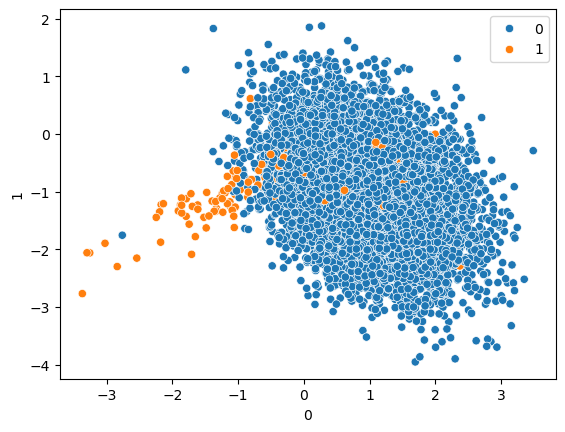

In [38]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [39]:
# split the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

class_weight : dict or 'balanced', default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [40]:
# Hyperparameter tuning
model = LogisticRegression()

penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01] # inversion of regularization parameter
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
l1_ratio = [0.4,0.45,0.5,0.55,0.6]

# it forms list of dictionary having w X y number of elements
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

print(class_weight)

[{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}]


In [41]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight,l1_ratio=l1_ratio)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}],
 'l1_ratio': [0.4, 0.45, 0.5, 0.55, 0.6]}

In [42]:
# GridSearchCV

cv = StratifiedKFold()

grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [43]:
grid.fit(X_train,y_train)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'l1_ratio': [0.4, 0.45, 0.5, 0.55, 0.6],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [44]:
print("Parameters: \n",grid.best_estimator_)
print("Score: \n",grid.best_score_)
grid.best_params_

Parameters: 
 LogisticRegression(C=10, class_weight={0: 100, 1: 50}, l1_ratio=0.4,
                   solver='saga')
Score: 
 0.9887142857142859


{'C': 10,
 'class_weight': {0: 100, 1: 50},
 'l1_ratio': 0.4,
 'penalty': 'l2',
 'solver': 'saga'}

In [45]:
y_pred_test_unbl = grid.predict(X_test)

score = accuracy_score(y_test,y_pred_test_unbl)
print("Test Accuracy Score: ",score)

cm = confusion_matrix(y_test,y_pred_test_unbl)
print("Confusion Matrix: \n",cm)

print(classification_report(y_test,y_pred_test_unbl))

Test Accuracy Score:  0.9883333333333333
Confusion Matrix: 
 [[2948    5]
 [  30   17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2953
           1       0.77      0.36      0.49        47

    accuracy                           0.99      3000
   macro avg       0.88      0.68      0.74      3000
weighted avg       0.99      0.99      0.99      3000

